<a href="https://colab.research.google.com/github/john-hafner/PHY451-GammaRay/blob/main/Gamma_Ray_Peak_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures



In [2]:
data_url = 'https://raw.githubusercontent.com/john-hafner/PHY451-GammaRay/main/data/spectrum_jan31.csv'
df = pd.read_csv(data_url)
df.head()

,element,peak,roi_start,roi_end,gross,net,energy,fwhm,Detector,Voltage,Course Gain,Fine Gain,Notes
0,Ba-133,1,72,88,47645,14531,81.0,9.0,NaI,800,8,1.24,NaN
1,Ba-133,2,107,129,9505,3444,118.0,14.0,NaI,800,8,1.24,NaN
2,Ba-133,3,291,317,9500,1463,304.4,11.2,NaI,800,8,1.24,NaN
3,Ba-133,4,344,371,23786,4714,358.1,17.6,NaI,800,8,1.24,NaN
4,Cs-137,1,8,27,6471,4260,21.0,4.0,NaI,800,8,1.24,"In channels, not KeV"


In [3]:
# Cleaning up by dropping the unneeded (so far) columns

spec_df = df.loc[df['element'] != 'Cs-137', ['element', 'peak', 'roi_start', 'roi_end', 'net', 'energy', 'fwhm']]
spec_df.head()

,element,peak,roi_start,roi_end,net,energy,fwhm
0,Ba-133,1,72,88,14531,81.0,9.0
1,Ba-133,2,107,129,3444,118.0,14.0
2,Ba-133,3,291,317,1463,304.4,11.2
3,Ba-133,4,344,371,4714,358.1,17.6
6,Co-57,1,112,148,1203,126.0,14.0


### $\sigma_{\bar{E}} = \frac{\sigma}{\sqrt{n}}$
Computing the $\sigma_{\bar{E}}$ for the peak energy, using the centroid from the peak as read out from the MCA software.  The **net** column is how many counts were in that peak, so that serves as our $n$ value to help tighten up the uncertainty.

In [4]:
f = 2.355
spec_df['e_sigma'] = spec_df['fwhm'] / f / np.sqrt(spec_df['net'])
spec_df.head()

,element,peak,roi_start,roi_end,net,energy,fwhm,e_sigma
0,Ba-133,1,72,88,14531,81.0,9.0,0.031703
1,Ba-133,2,107,129,3444,118.0,14.0,0.101299
2,Ba-133,3,291,317,1463,304.4,11.2,0.124338
3,Ba-133,4,344,371,4714,358.1,17.6,0.108850
6,Co-57,1,112,148,1203,126.0,14.0,0.171397


In [5]:
spec_df.loc[spec_df['element'] == 'Co-60',:]

,element,peak,roi_start,roi_end,net,energy,fwhm,e_sigma
13,Co-60,1,1082,1223,4391,1149.0,56.0,0.358852
14,Co-60,2,1125,1390,3899,1307.0,59.0,0.401222


### Co-60 Summary
Our values of 1149 and 1307 KeV are definitely not as close on the money as $\sigma_{\bar{E}}$ would indicate.  Our measurement on the first is 1149 KeV, but [the literature](https://www.gammaspectacular.com/blue/Co-60-gamma-spectrum#:~:text=Co60%20Gamma%20spectrum,-Cobalt%2060&text=Co60%20is%20a%20common%20calibration,and%20another%20at%201332.5%20KeV.) says 1173.2 KeV.  And our uncertainty is way too exact.

But this could be in large part due to our uncertainty in setting up the energy calibration propagating through.  But it's clear that using FWHM might be a better approach.

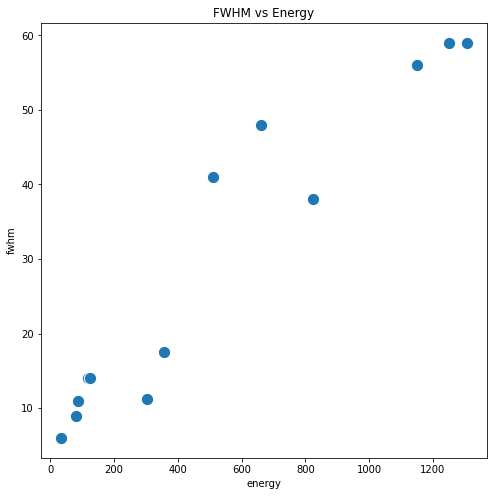

In [6]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=spec_df, x='energy', y='fwhm', s=150)
plt.title('FWHM vs Energy')
plt.show()

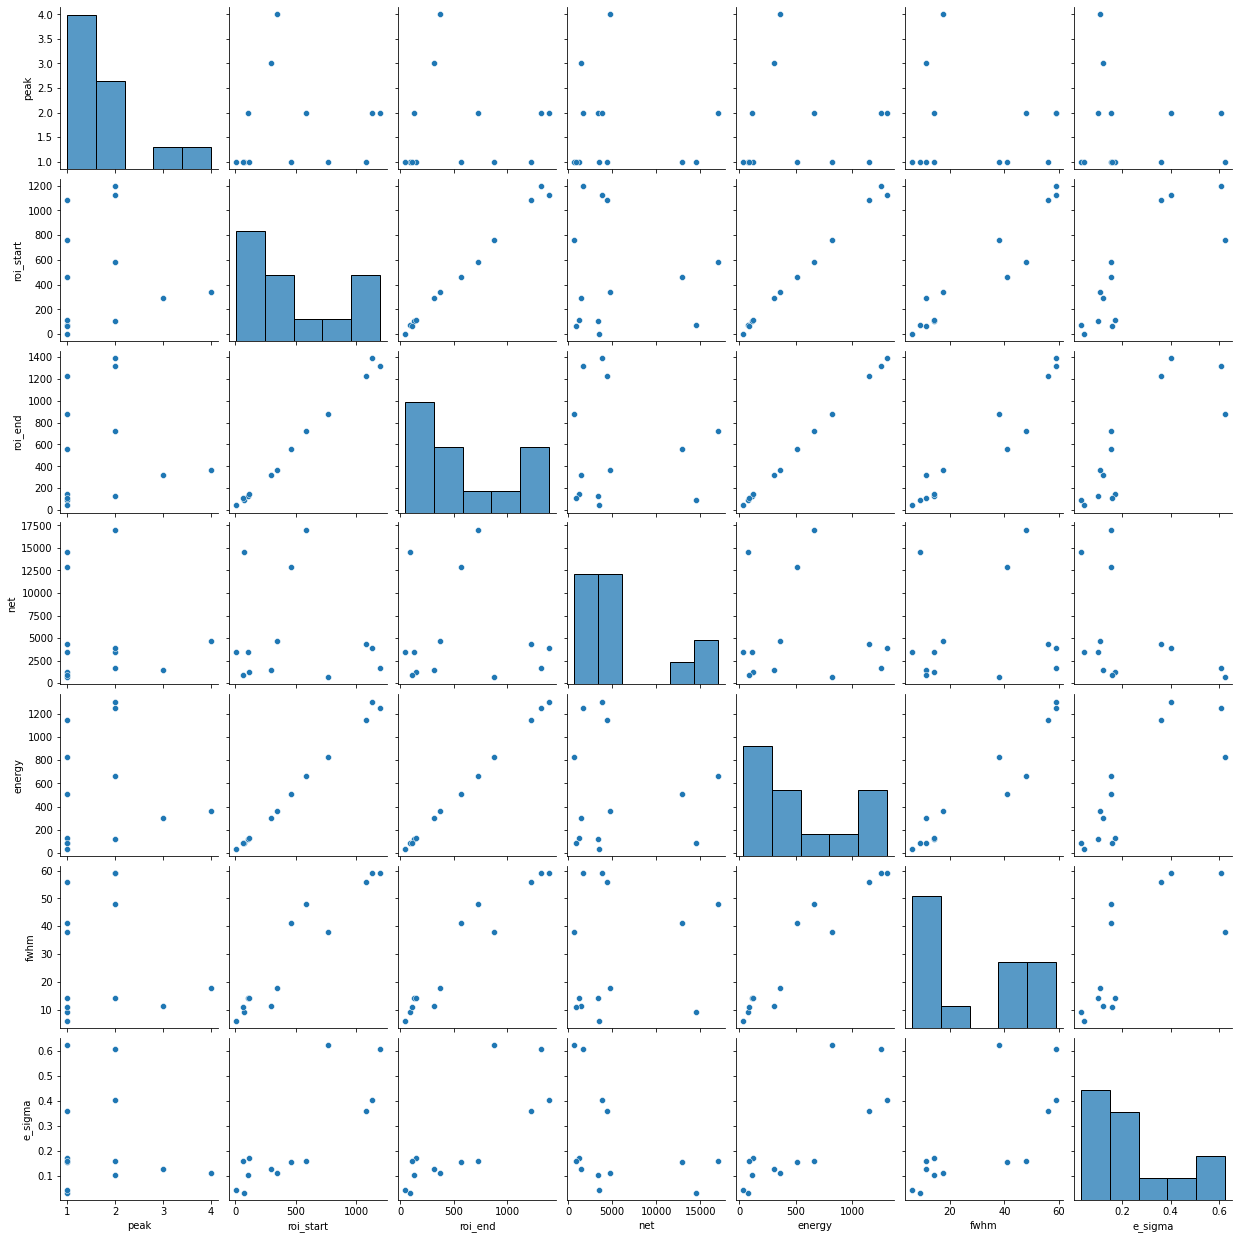

In [7]:
sns.pairplot(spec_df)

In [8]:
ratio = spec_df['fwhm'] / spec_df['energy']
ratio

0     0.111111
1     0.118644
2     0.036794
3     0.049148
6     0.111111
7     0.080078
8     0.047162
9     0.176471
10    0.072617
11    0.046061
12    0.126437
13    0.048738
14    0.045142
dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


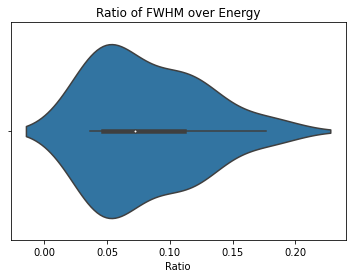

In [9]:
sns.violinplot(ratio)
plt.title('Ratio of FWHM over Energy')
plt.xlabel('Ratio')
plt.show()

In [9]:
sns.heatmap(spec_df.corr(), vmin=-1, vmax=1, cmap='viridis_r')